<a href="https://colab.research.google.com/github/anamunoz01/PROYECTO-INTEGRADOR-III/blob/main/ClasBinaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MODELO PREDICTIVO DE ATAQUES AL CORAZÓN CON REDES NEURONALES** 

**Proyecto Integrador III**

- Elena Gómez

- Ana Muñoz

- Inés Sánchez

- Miriam Toledo


## **Objetivo**

Vamos a predecir la posibilidad de sufrir un ataque al corazón dependiendo de diferentes características relacionadas con la salud del paciente.  

Para ello creamos un modelo de clasificación binaria, con el que obtendremos una salida que será 0 o 1.
- 0 significará que la probabilidad de sufrir un ataque al corazón es muy baja.
-1 será el caso contrario, es decir, que la probabilidad es alta.

La base de datos que utilizaremos la encontramos en kaggle.com, como Health care: Heart attack possibility. 

Las características que vamos a estudiar son las siguientes:
1. Edad
2. Sexo
3. Tipo de dolor de pecho (4 tipos)
4. Presión en sangre
5. Colesterol en mg/dl
6. Azúcar en sangre > 120 mg/dl
7. Resultado electrocardiograma (valores 0, 1, 2)
8. Frecuencia cardiaca máxima alcanzada
9. Angina de pecho (inducida por el ejercicio)
10. Depresión del ST inducida por el ejercicio en relación con el reposo
11. La pendiente del segmento ST máximo del ejercicio
12. Número de vasos mayores (0-3) coloreados por la fluoroscopia
13. thal: 0 = normal; 1 = defecto fijo; 2 = defecto reversible
14. objetivo: 0= menos posibilidades de infarto 1= más posibilidades de infarto

**Estudio y análisis de datos**

In [42]:
import keras
keras.__version__

'2.8.0'

In [43]:
import pandas as pd
import numpy as np

df = pd.read_excel('dataset heart attack.xlsx')


In [44]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Creamos dos dataframes nuevos separando variables numéricas de categóricas 

In [45]:
continuas = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
continuas

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6
...,...,...,...,...,...
298,57,140,241,123,0.2
299,45,110,264,132,1.2
300,68,144,193,141,3.4
301,57,130,131,115,1.2


Normalizamos las continuas

In [46]:
mean = continuas.mean(axis=0)
#print(mean)
#continuas -= mean
std = continuas.std(axis=0)
#print(std)
continuas /= std

continuas

,age,trestbps,chol,thalach,oldpeak
0,6.936721,8.267694,4.495401,6.548742,1.980923
1,4.073947,7.412415,4.823391,8.164099,3.014448
2,4.514374,7.412415,3.935887,7.509225,1.205779
3,6.165974,6.842230,4.553282,7.771174,0.689017
4,6.276081,6.842230,6.829922,7.116300,0.516762
...,...,...,...,...,...
298,6.276081,7.982601,4.649749,5.369969,0.172254
299,4.954801,6.272044,5.093501,5.762893,1.033525
300,7.487254,8.210676,3.723658,6.155818,2.928321
301,6.276081,7.412415,2.527457,5.020703,1.033525


In [47]:
clases = df[['sex', 'fbs', 'exang', 'cp', 'restecg', 'slope', 'ca', 'thal']]
clases

,sex,fbs,exang,cp,restecg,slope,ca,thal
0,1,1,0,3,0,0,0,1
1,1,0,0,2,1,0,0,2
2,0,0,0,1,0,2,0,2
3,1,0,0,1,1,2,0,2
4,0,0,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...
298,0,0,1,0,1,1,0,3
299,1,0,0,3,1,1,0,3
300,1,1,0,0,1,1,2,3
301,1,0,1,0,1,1,1,3


In [ ]:
#x = ['sex', 'fbs', 'exang', 'cp', 'restecg', 'slope', 'ca', 'thal']

Vectorizamos las variables categóricas y las unimos al dataframe con las variables continuas ya normalizadas

In [48]:

normalizado = continuas
for i in clases:
  y = pd.get_dummies(df[i] ,prefix = i)
  #print(y)
  normalizado = normalizado.join(y)


normalizado = normalizado.join(df['target'])
normalizado 

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,fbs_0,fbs_1,exang_0,...,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,target
0,6.936721,8.267694,4.495401,6.548742,1.980923,0,1,0,1,1,...,1,0,0,0,0,0,1,0,0,1
1,4.073947,7.412415,4.823391,8.164099,3.014448,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,1
2,4.514374,7.412415,3.935887,7.509225,1.205779,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,1
3,6.165974,6.842230,4.553282,7.771174,0.689017,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,1
4,6.276081,6.842230,6.829922,7.116300,0.516762,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,6.276081,7.982601,4.649749,5.369969,0.172254,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
299,4.954801,6.272044,5.093501,5.762893,1.033525,0,1,1,0,1,...,1,0,0,0,0,0,0,0,1,0
300,7.487254,8.210676,3.723658,6.155818,2.928321,0,1,0,1,1,...,0,0,1,0,0,0,0,0,1,0
301,6.276081,7.412415,2.527457,5.020703,1.033525,0,1,1,0,0,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
from keras.utils.np_utils import to_categorical

In [49]:
train_data = normalizado.sample(frac=0.8,random_state=0)
# El resto de datos los almacenamos en test_data:
test_data = normalizado.drop(train_data.index)

In [50]:
train_data

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,fbs_0,fbs_1,exang_0,...,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,target
225,7.707468,8.267694,3.357080,5.457285,2.239304,0,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
152,7.046828,9.693159,4.379639,6.767034,0.516762,0,1,1,0,1,...,1,0,0,0,0,0,0,0,1,1
228,6.496294,9.693159,5.556547,6.941667,0.172254,0,1,1,0,1,...,1,0,0,0,0,0,0,0,1,0
201,6.606401,7.127323,4.977740,6.155818,2.411558,0,1,1,0,0,...,0,1,0,0,0,0,0,0,1,0
52,6.826614,7.412415,4.456814,6.374109,1.550287,0,1,1,0,1,...,0,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,6.606401,5.815895,6.135354,6.985325,0.000000,1,0,1,0,1,...,0,1,0,0,0,0,0,1,0,1
285,5.064907,7.982601,6.000299,5.238994,1.550287,0,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
11,5.285121,7.412415,5.305731,6.068501,0.172254,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,1
119,5.064907,7.868564,4.688336,6.636059,0.000000,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1


In [51]:
train_labels = train_data.pop('target')
test_labels = test_data.pop('target')

Creamos la red

In [52]:
import tensorflow as tf

from keras import models
from keras import layers

model = models.Sequential()
# Entrada, un tensor con la crítica vectorizada (10000 valores)
model.add(layers.Dense(16, activation='relu', input_shape=(30,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

DATOS VALIDACION

In [ ]:
x_val = train_data[:160]
partial_x_train = train_data[160:]

y_val = train_labels[:160]
partial_y_train = train_labels[160:]

In [53]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=50,
                    batch_size=40,   #con 60 accuracy tdo el rato 4146  (epochs = 20)
                    validation_data=(x_val, y_val))

Epoch 1/50
3/3 [==============================] - 1s 88ms/step - loss: 0.7575 - accuracy: 0.4512 - val_loss: 0.6760 - val_accuracy: 0.5625
Epoch 2/50
3/3 [==============================] - 0s 15ms/step - loss: 0.6870 - accuracy: 0.5732 - val_loss: 0.6460 - val_accuracy: 0.6062
Epoch 3/50
3/3 [==============================] - 0s 26ms/step - loss: 0.6485 - accuracy: 0.6341 - val_loss: 0.6198 - val_accuracy: 0.6750
Epoch 4/50
3/3 [==============================] - 0s 15ms/step - loss: 0.6139 - accuracy: 0.7317 - val_loss: 0.6069 - val_accuracy: 0.7063
Epoch 5/50
3/3 [==============================] - 0s 14ms/step - loss: 0.6021 - accuracy: 0.7561 - val_loss: 0.5881 - val_accuracy: 0.7500
Epoch 6/50
3/3 [==============================] - 0s 22ms/step - loss: 0.5693 - accuracy: 0.8293 - val_loss: 0.5877 - val_accuracy: 0.6875
Epoch 7/50
3/3 [==============================] - 0s 15ms/step - loss: 0.5536 - accuracy: 0.8171 - val_loss: 0.5722 - val_accuracy: 0.7250
Epoch 8/50
3/3 [===========

Graficamos datos obtenidos

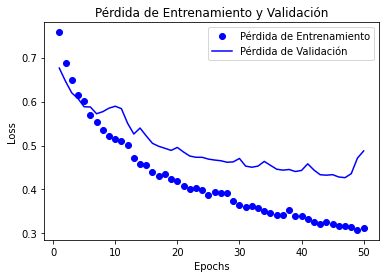

In [54]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es para "punto azun"
plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
# "b" es para "linea continua azul"
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

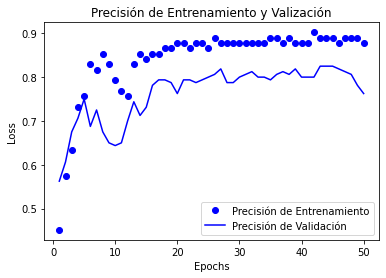

In [55]:
plt.clf()   # Limpia la figura
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
plt.title('Precisión de Entrenamiento y Valización')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()